In [1]:
from fenics import *
import time
import matplotlib.pyplot as plt
%matplotlib inline
from dolfin import *

In [2]:
from mshr import Rectangle, Circle, generate_mesh

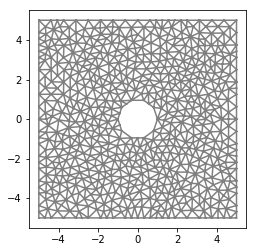

In [21]:
T = 1.0            # final time
num_steps = 100     # number of time steps
dt = T / num_steps # time step size

# Create mesh and define function space
nx = ny = 30
lx = ly = 5.0
R = 1.0

# Define 2D geometry
rectangle = Rectangle(Point(-lx,-ly), Point(lx, ly))
well = Circle(Point(0, 0), R)
dom = rectangle - well

# Generate and plot mesh
mesh = generate_mesh(dom, 20)
plot(mesh, "2D mesh")

In [22]:
dt = 0.001

In [23]:
V = FunctionSpace(mesh, 'P', 1)

In [24]:
# Define boundaries
wallsy    = 'near(x[1], -5.0) || near(x[1], 5.0)'
wallsx    = 'near(x[0], -5.0) || near(x[0], 5.0)'
cylinder = 'on_boundary && x[0]<2.0 && x[0]>-2.0 && x[1]>-2.0 && x[1]<2.0'


# Define boundary conditions
bcu_wallsy = DirichletBC(V, Constant(0.), wallsy)
bcu_wallsx = DirichletBC(V, Constant(0.), wallsx)

bcu_cylinder = DirichletBC(V, Constant(1.), cylinder)
bcu = [bcu_wallsx, bcu_wallsy, bcu_cylinder]

In [32]:
vel = Expression(('10. + x[0]/2/DOLFIN_PI/(pow(x[0],2) + pow(x[1],2))',
                  '0 + x[1]/2/DOLFIN_PI/(pow(x[0],2) + pow(x[1],2))'  ), domain=mesh, degree=2)


In [33]:
dx = Measure('dx', domain = mesh)

In [34]:
# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(0)

# Define initial value
u_0 = Expression('0', domain=mesh, degree=2)
u_n = interpolate(u_0, V)

sigma = 1

a = u * v * dx
L =  u_n * v * dx + dt * dot(vel, grad(u_n)) * v * dx - dt/2 * sigma ** 2 * dot(grad(u_n),grad(v)) * dx



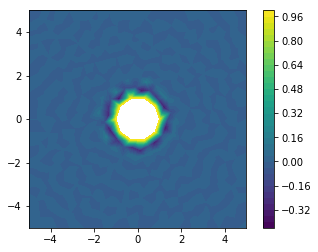

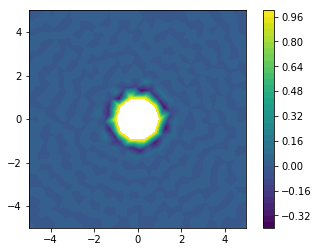

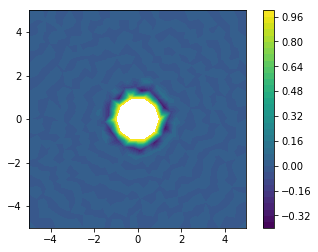

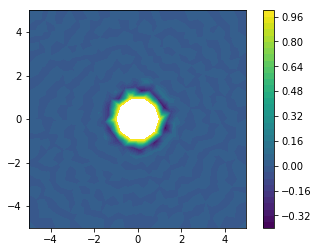

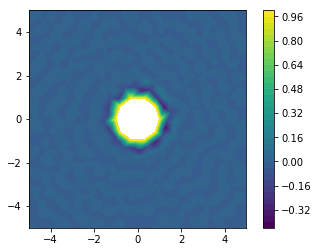

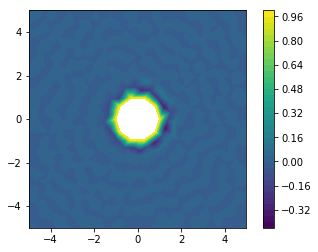

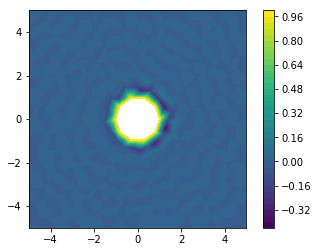

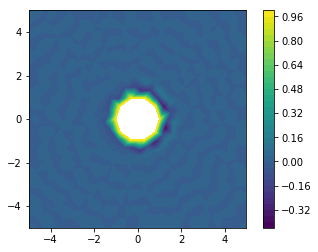

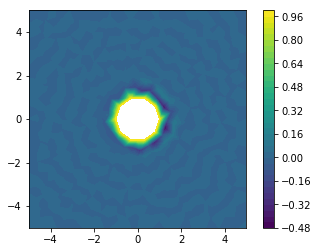

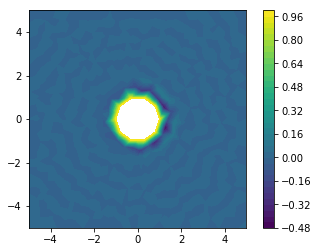

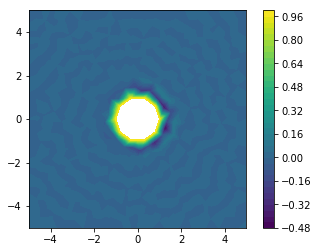

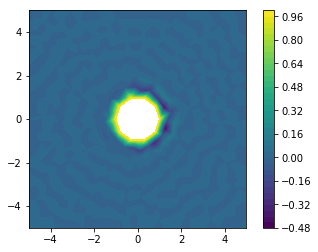

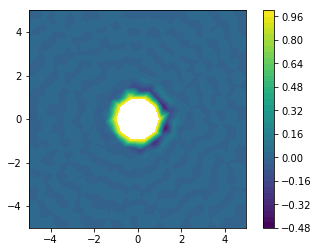

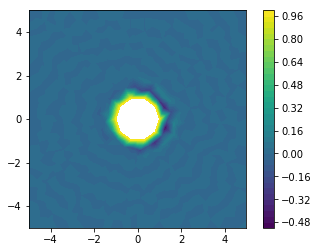

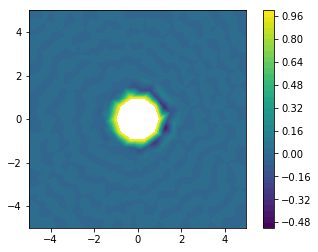

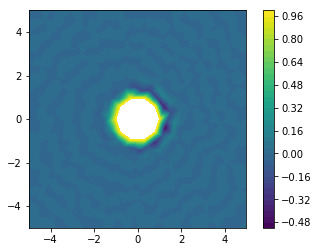

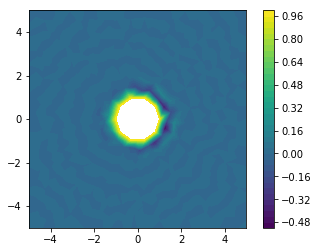

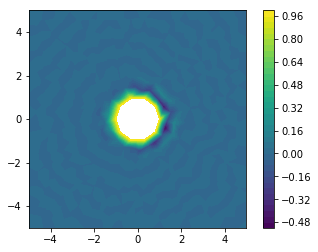

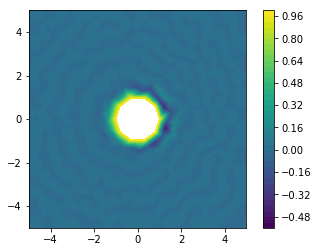

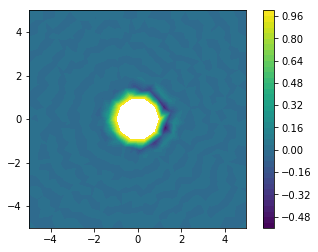

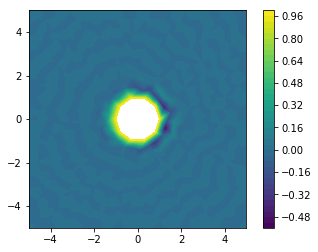

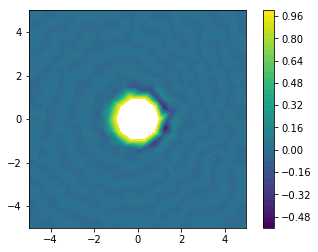

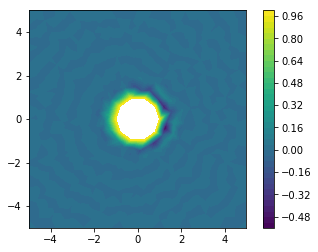

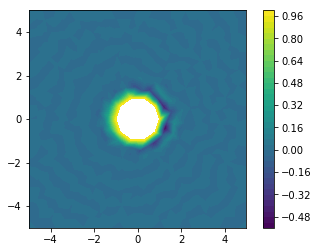

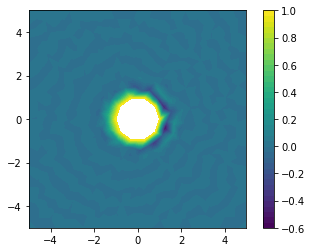

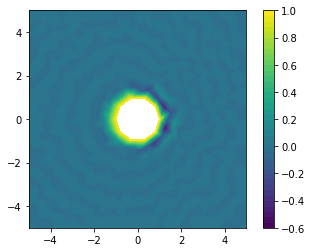

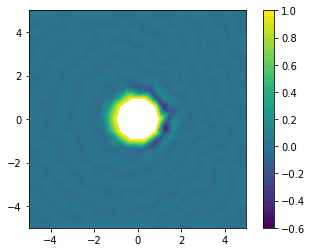

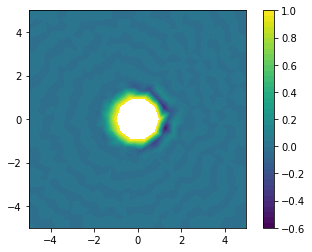

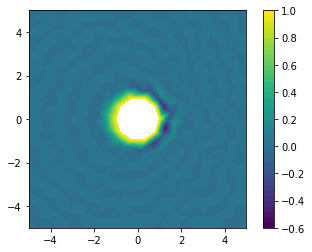

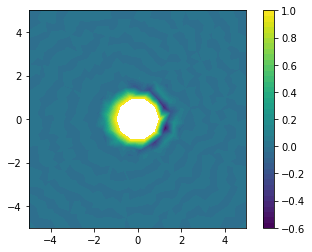

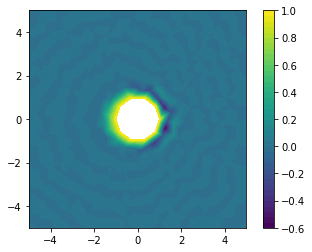

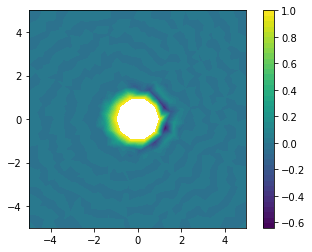

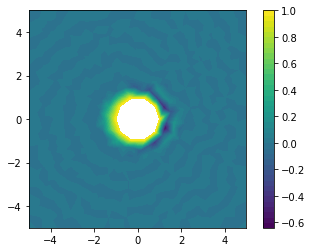

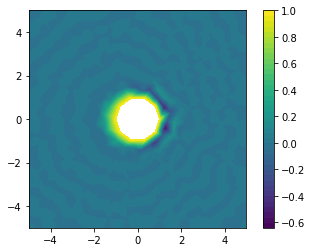

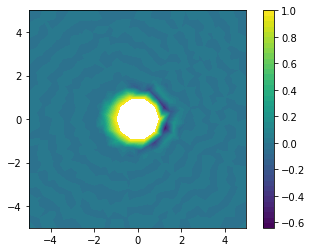

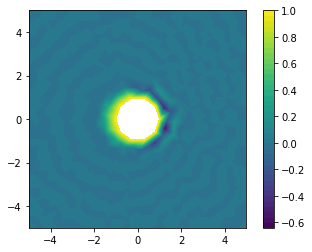

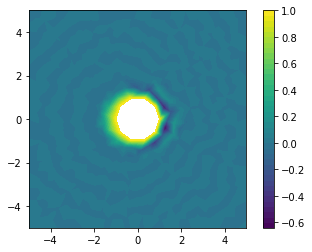

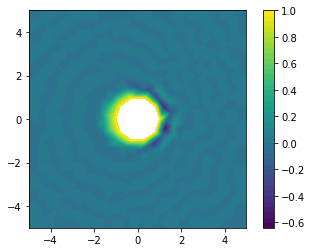

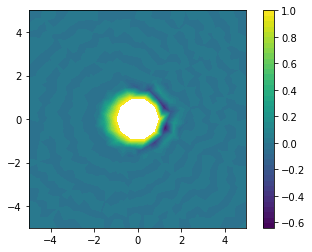

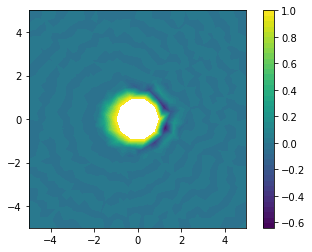

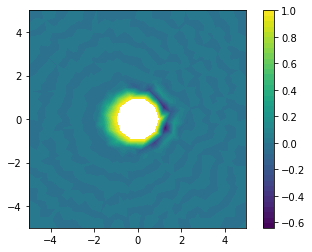

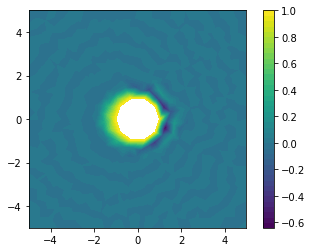

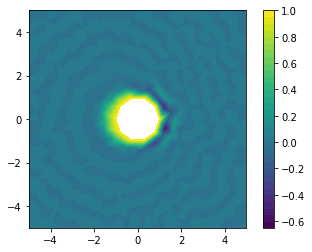

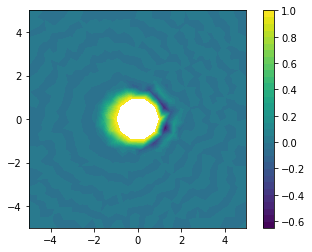

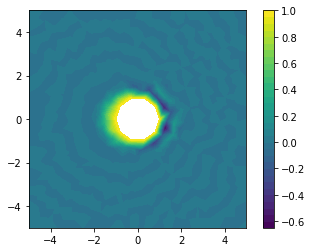

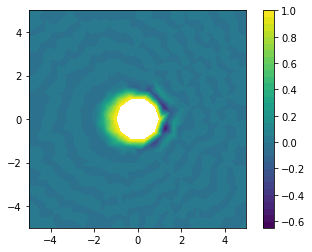

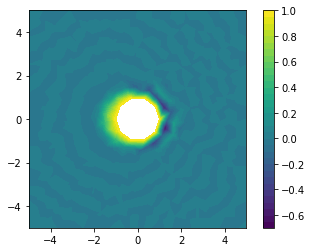

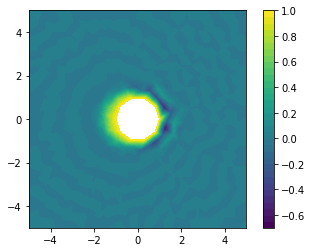

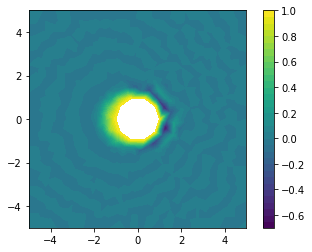

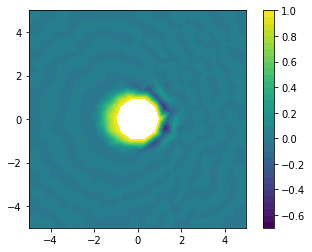

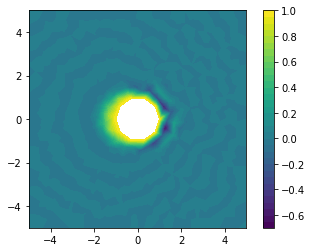

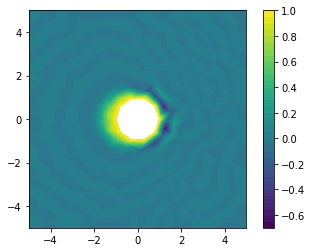

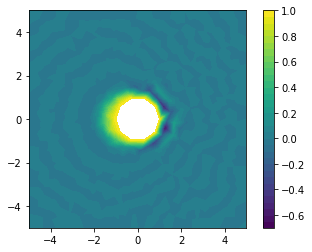

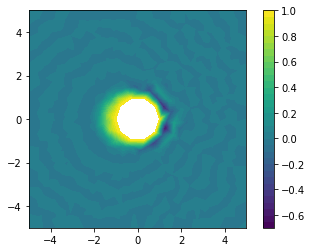

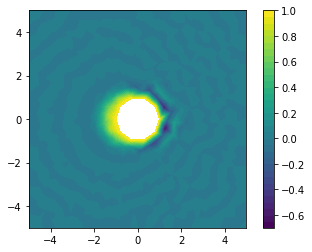

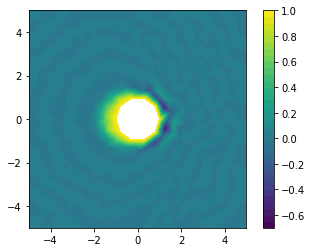

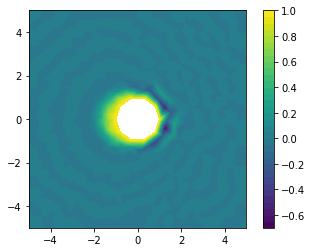

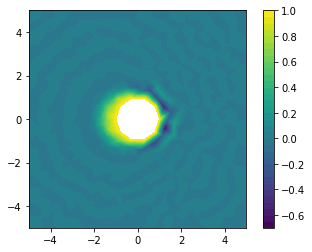

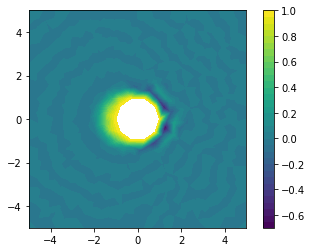

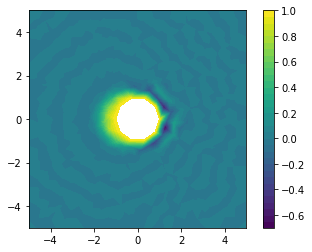

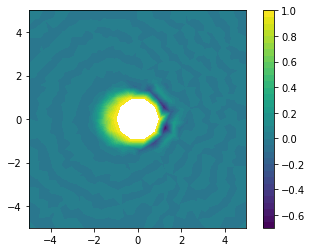

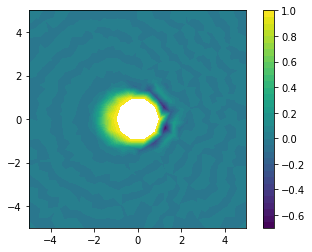

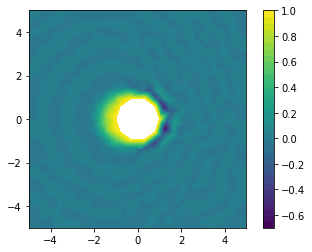

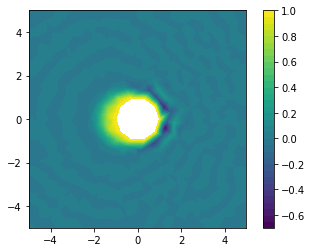

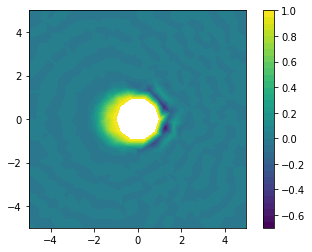

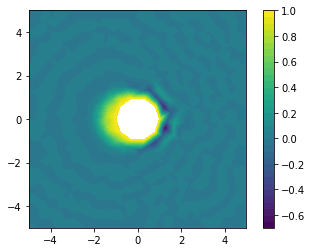

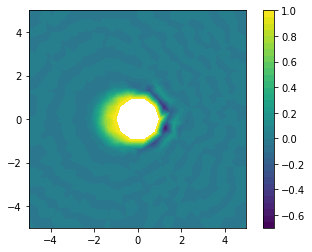

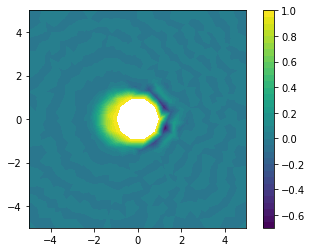

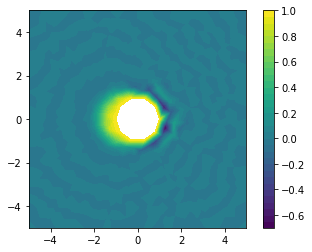

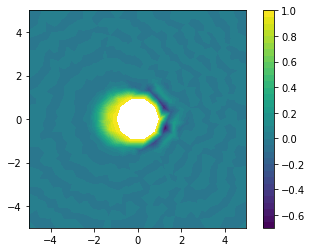

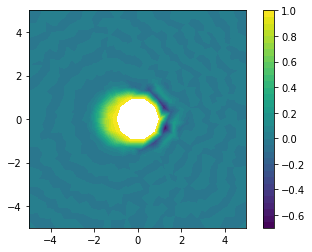

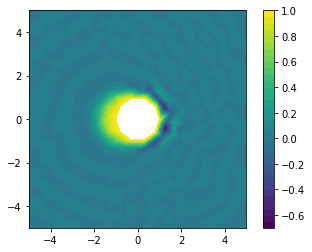

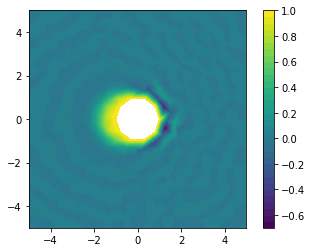

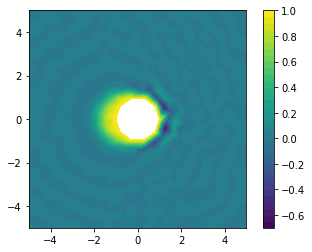

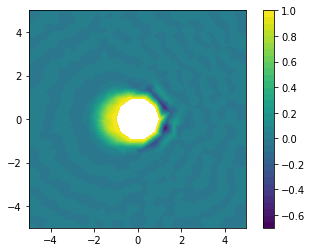

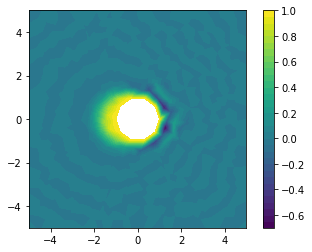

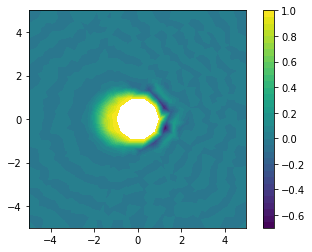

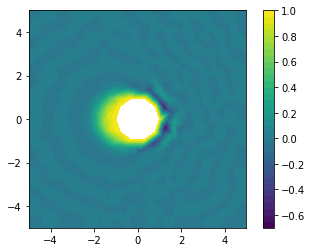

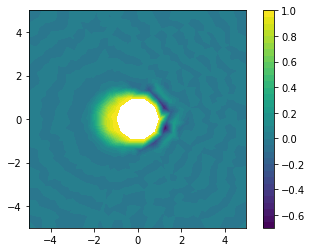

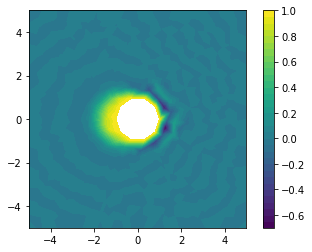

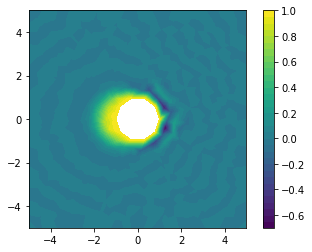

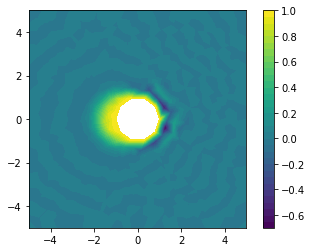

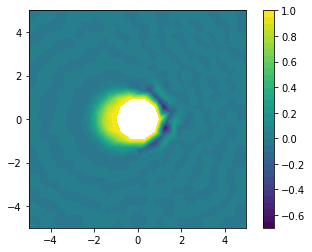

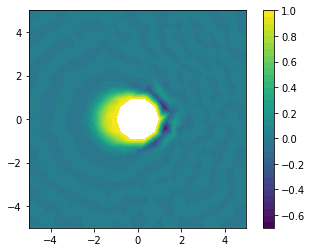

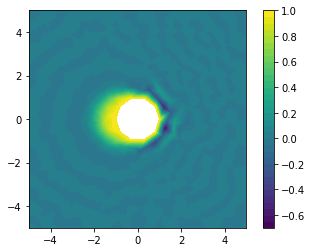

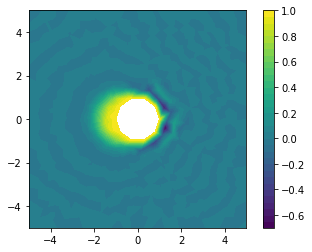

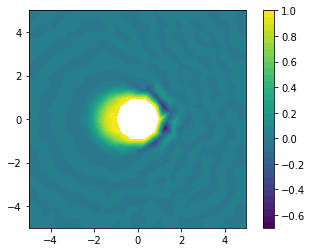

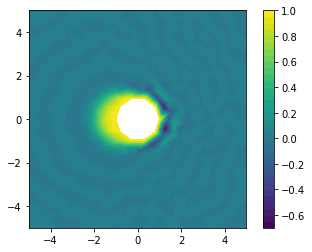

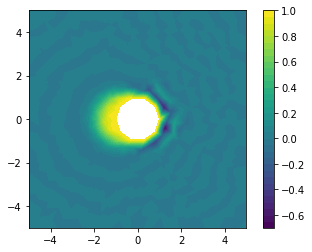

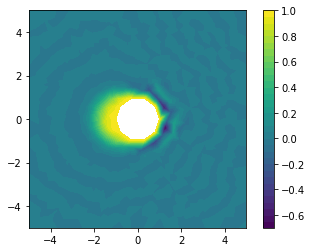

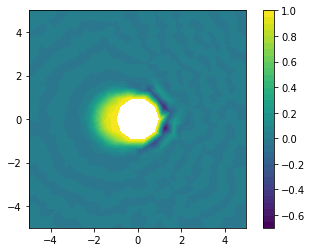

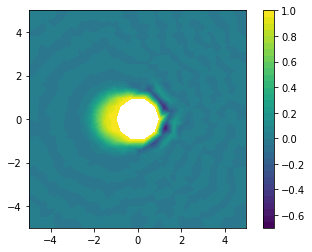

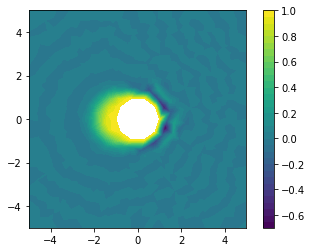

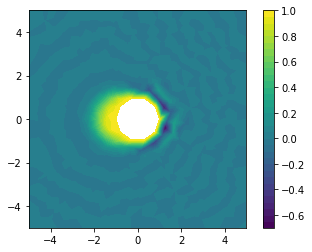

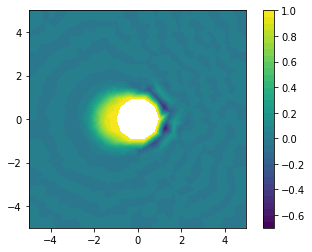

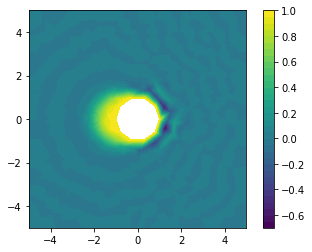

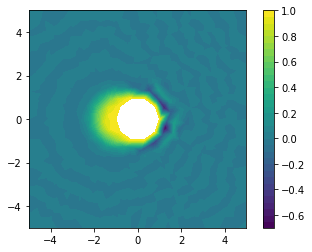

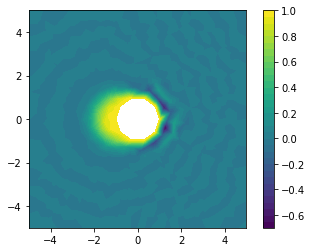

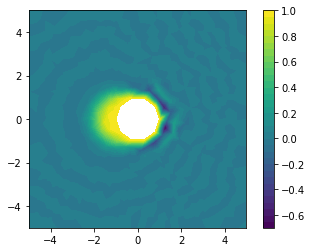

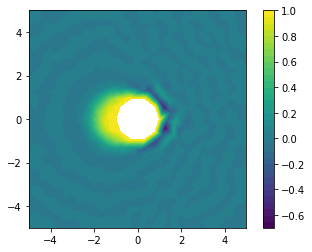

In [35]:
# Time-stepping
u = Function(V)

t = 0
for n in range(num_steps):

    # Update current time
    t += dt

    # Compute solution
    solve(a == L, u, bcu)

    # Save to file and plot solution
    p=plot(u)
    plt.colorbar(p)
    plt.show()
    u_n.assign(u)

In [36]:
u(1.8,1.2)

-0.011529360932658085